<a href="https://colab.research.google.com/github/SchimeNo/Deep-Learning-with-Python/blob/main/02_The_mathematical_building_blocks_of_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **02 The mathematical building blocks of neural networks** 
---


In [ ]:
#!pip install keras
from keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Shape:", train_images.shape,"Length:", len(train_labels),"Array:", train_labels,sep="\n")

Shape:
(60000, 28, 28)
Length:
60000
Array:
[5 0 4 ... 5 6 8]


In [ ]:
print("Shape:", test_images.shape,"Length:", len(test_labels),"Array:", test_labels,sep="\n")

Shape:
(10000, 28, 28)
Length:
10000
Array:
[7 2 1 ... 4 5 6]


## Network architecture

**Loss function:**
-  How the network will be able to measure its performance on
the training data, and thus how it will be able to steer itself in the right direction.

**Optimizer:**
- The mechanism through which the network will update itself
based on the data it sees and its loss function.

**Metrics:**
- Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).



In [ ]:
# Network architecture

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))





### The compilation step (optimizer, loss, metric)

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Preparing the image data

We’ll transform the data into a float32 array of shape (60000, 28 * 28) with values between 0 and 1


In [ ]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### Preparing the labels

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

###Train the network


In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4205 - accuracy: 0.8771
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1127 - accuracy: 0.9671
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0723 - accuracy: 0.9785
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0504 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0366 - accuracy: 0.9885


### Use on test set

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0679 - accuracy: 0.9794
test_acc: 0.06788118928670883


# 2.2 Tensors



Data stored in multidimensional Numpy arrays. It's a container for data—almost always numerical data. So, it’s a
container for numbers. You may be already familiar with matrices, which are 2D tensors: tensors are a generalization of matrices to an arbitrary number of dimensions
(note that in the context of tensors, a dimension is often called an axis).



#### Scalars (0D tensors)
A tensor that contains only one number is called a scalar

In [ ]:
import numpy as np
x=np.array(12)
print(x,"\ndim:", x.ndim)

12 
dim: 0


#### Vectors

In [ ]:
x = np.array([12, 3, 6, 14])
print("\ndim:", x.ndim)


dim: 1


#### Matrices (2D tensors) 

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]])
print("\ndim:", x.ndim)


dim: 2


#### 3D tensors and higher-dimensional tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]]])
print("\ndim:", x.ndim)




dim: 3


In deep learning, you’ll generally manipulate tensors that are 0D to 4D, although you may go up to
5D if you process video data. 

### Key attributes

* Number of axes (rank)—For instance, a 3D tensor has three axes, and a matrix has
two axes. Also called the tensor’s ndim .
* Shape—This is a tuple of integers that describes how many dimensions the tensor has along each axis. 
* Data type (usually called dtype in Python libraries)—This is the type of the data
contained in the tensor.




In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28)
uint8


We have here is a 3D tensor of 8-bit integers. More precisely, it’s an array of
60,000 matrices of 28 × 8 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255.

### Displaying a digit

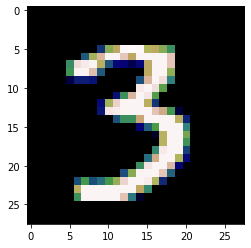

In [ ]:
digit = train_images[10000]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.gist_earth)
plt.show()

###  Manipulating tensors in Numpy

In [ ]:
my_slice=train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


####  select 14 × 14 pixels in the bottom-right corner of all images

In [ ]:

my_slice=train_images[:,14:,14:]
print(my_slice.shape)

(60000, 14, 14)


#### crop the images to patches of 14 × 14 pixels centered in the middle

In [ ]:
my_slice=train_images[:,7:-7, 7:-7]

### Data batches
The first axis will be the samples axis. In the MNIST example, samples are images of digits.

In, deep-learning models don’t process an entire dataset at once; rather,
they break the data into small batches. Concretely, here’s one batch of our MNIST digits, with batch size of 128


In [ ]:
batch = train_images[:128]

### Real-world examples of data tensors
Vector data—2D tensors of shape (samples, features)
* Timeseries data or sequence data—3D tensors of shape (samples, timesteps,
features)
* Images—4D tensors of shape (samples, height, width, channels) or (samples,
channels, height, width)
* Video—5D tensors of shape (samples, frames, height, width, channels) or
(samples, frames, channels, height, width)

# 2.3 Tensor operations

* dot: product between the input tensor and a tensor named W
* (+) : addition (+) between the resulting 2D tensor and a vector b
+  relu(x):  rectified linear unit,  this returns the standard ReLU activation max(x, 0)




In [ ]:
def naive_relu(x):
  assert len(x.shape) == 2
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

def naive_add(x,y):
  assert len(x.shape)==2
  assert x.shape == y.shape
  x=x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[i,j]
  return x

In [ ]:


#Keras layer instance
layers.Dense(512, activation='relu')

#new representation for the input tensor (where W is a 2D tensor and b is a vector)

# output=naive_relu(naive_add(W, input)+b)


## Broadcasting

What happens with addition when the shapes of the two tensors
being added differ?

When possible, and if there’s no ambiguity, the smaller tensor will be broadcasted to match the shape of the larger tensor. Broadcasting consists of two steps:

1. Axes (called broadcast axes) are added to the smaller tensor to match the ndim of the larger tensor.
2. The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

In [ ]:
def naive_add_matrix_and_vector(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j]+=y[j]
  return 
  

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

# output z has shape (64, 3, 32, 10) like x
z.shape


(64, 3, 32, 10)

## Tensor dot

also called a tensor product, is the most useful tensor operation. In both Numpy and Keras it’s done using the standard dot operator.

In [ ]:
import numpy as np
z = np.dot(x, y)

ValueError: ignored

In [ ]:
# VECTOR
def naive_vector_dot(x, y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]
  z = 0.
  for i in range(x.shape[0]):
    z += x[i] * y[i]
  return z

# MATRIX
import numpy as np
def naive_matrix_vector_dot(x, y):
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    z[i] = naive_vector_dot(x[i, :], y)
  return z

Note that as soon as one of the two tensors has an ndim greater than 1, dot is no longer symmetric, which is to say that dot(x, y) isn’t the same as dot(y, x).

## Tensor reshaping

Reshaping a tensor means rearranging its rows and columns to match a target shape. Naturally, the reshaped tensor has the same total number of coefficients as the initial tensor

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.], [2., 3.], [4., 5.]])
x.shape

In [ ]:
x = x.reshape((6, 1))
x.shape

### Transposing 
 means exchanging its rows and its columns, so that x[i, :] becomes x[:, i]:


In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

# 2.4 Gradient-based optimization

As you saw in the previous section, each neural layer from our first network example
transforms its input data as follows:

```
output = relu(dot(W, input) + b)
```

In this expression, W and b are tensors that are attributes of the layer. They’re called
the weights or trainable parameters of the layer (the kernel and bias attributes, respectively). These weights contain the information learned by the network from exposure
to training data.

## Training loop

1. Draw a batch of training samples x and corresponding targets y.
2. Run the network on x (a step called the forward pass) to obtain predictions y_pred.
3. Compute the loss of the network on the batch, a measure of the mismatch
between y_pred and y.
4. Update all weights of the network in a way that slightly reduces the loss on this
batch.

## Stochastic gradient descent

* A function’s minimum is a point where the derivative is 0
* Given a differentiable function, it’s theoretically possible to find its minimum
* Applied to a neural network, that means finding analytically the combination of
weight values that yields the smallest possible loss function
* This can be done by solving the equation gradient(f)(W) = 0 for W. 
*  If you
update the weights in the opposite direction from the gradient, the loss will be a little
less every time



---



1. Draw a batch of training samples x and corresponding targets y.
2. Run the network on x to obtain predictions y_pred.
3. Compute the loss of the network on the batch, a measure of the mismatch
between y_pred and y.
4. Compute the gradient of the loss with regard to the network’s parameters (a
backward pass).
5. Move the parameters a little in the opposite direction from the gradient—for
example W -= step * gradient—thus reducing the loss on the batch a bit.




# Chapter summary
* Learning means finding a combination of model parameters that minimizes a loss function for a given set of training data samples and their corresponding targets.
* Learning happens by drawing random batches of data samples and their
targets, and computing the gradient of the network parameters with
respect to the loss on the batch. The network parameters are then moved
a bit (the magnitude of the move is defined by the learning rate) in the
opposite direction from the gradient.
* The entire learning process is made possible by the fact that neural networks are chains of differentiable tensor operations, and thus it’s possible
to apply the chain rule of derivation to find the gradient function mapping the current parameters and current batch of data to a gradient value.
* Two key concepts you’ll see frequently in future chapters are loss and optimizers. These are the two things you need to define before you begin feeding data into a network.
* The loss is the quantity you’ll attempt to minimize during training, so it
should represent a measure of success for the task you’re trying to solve.
* The optimizer specifies the exact way in which the gradient of the loss will
be used to update parameters: for instance, it could be the RMSProp optimizer, SGD with momentum, and so on.